# Tracking of several entities

# Importations

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

import cv2

from tqdm import tqdm
import os
import shutil

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [3]:
def normalize8(I):
    mn = I.min()
    mx = I.max()
    I = ((I - mn) / (mx - mn)) * 255
    return I.astype(np.uint8)

# Inputs

In [5]:
folderpath = '/media/n.fares/KINGSTON/gliding_I_T/data/20250425_fps_5/3/*.tiff'
# folderpath = './20250410/1/*.tiff'

fps = 5

px = 298e-9 # x20
# px = 156e-9 # x40

# Get the frames 

In [6]:
@pims.pipeline
def gray(image, channel=2):
    # return image[:, :, channel]  # Take just one channel
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

frames = gray(pims.open(folderpath))

In [7]:
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: /media/n.fares/KINGSTON/gliding_I_T/data/20250425_fps_5/3/*.tiff
    Length: 6129 frames
    Frame Shape: (540, 720, 3)
    Pixel Datatype: uint8

# Compute the background

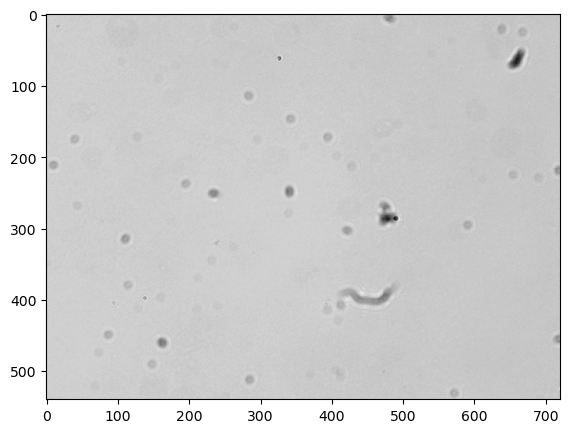

In [12]:
indexes = np.arange(100, 350, 10)
bg = np.median(frames[indexes], axis=0)
plt.figure()
plt.imshow(bg)
plt.show()

In [13]:
# Uncomment next cell if you want to load the background

In [14]:
# bg = cv2.imread('background.tiff')
# bg = gray(bg)
# plt.figure()
# plt.imshow(bg)
# plt.show()

# One image: Track Particles

In [15]:
im1 = frames[350]

In [16]:
# im1 = normalize8(im1)

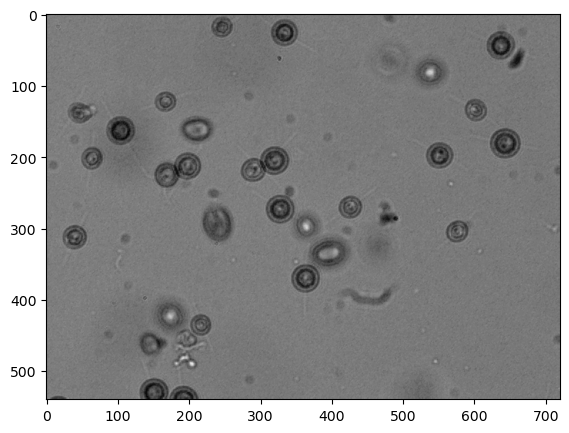

In [17]:
plt.imshow(im1);

In [18]:
im1

array([[68, 66, 68, ..., 64, 64, 64],
       [68, 66, 66, ..., 64, 64, 64],
       [66, 66, 63, ..., 64, 64, 64],
       ...,
       [67, 67, 67, ..., 67, 66, 66],
       [65, 65, 68, ..., 67, 63, 63],
       [65, 65, 68, ..., 67, 63, 63]], shape=(540, 720), dtype=uint8)

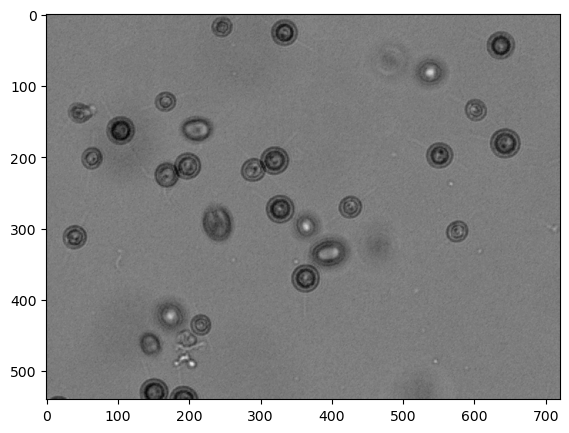

In [19]:
im2 = (im1 - bg) 
plt.imshow(im2)

In [20]:
im2

array([[ 2.,  0.,  1., ...,  0., -1., -1.],
       [ 1., -1., -1., ...,  0.,  1.,  1.],
       [-1., -1., -4., ...,  0.,  2.,  2.],
       ...,
       [ 1.,  1.,  2., ...,  4.,  2.,  2.],
       [ 0., -1.,  3., ...,  3., -1., -1.],
       [ 0., -1.,  3., ...,  3., -1., -1.]], shape=(540, 720))

In [21]:
f2 = tp.locate(im2, 51, invert=True, engine='python')

In [22]:
f2.head()

y           x          mass       size       ecc     signal  \
0  25.259295  333.418609  14903.519357  12.289610  0.009108  34.508669   
1  50.901213  140.725953    650.171490  17.430370  0.140679   3.802996   
2  43.331596  636.643894  15970.048500  12.732933  0.022580  33.945262   
3  56.407015   46.328154    598.338061  16.150211  0.092023   3.943848   
4  61.724981  480.375223   3230.152249  13.595482  0.187437  10.141323   

   raw_mass  ep  
0   28438.0 NaN  
1    2656.0 NaN  
2   30411.0 NaN  
3    1233.0 NaN  
4    8961.0 NaN

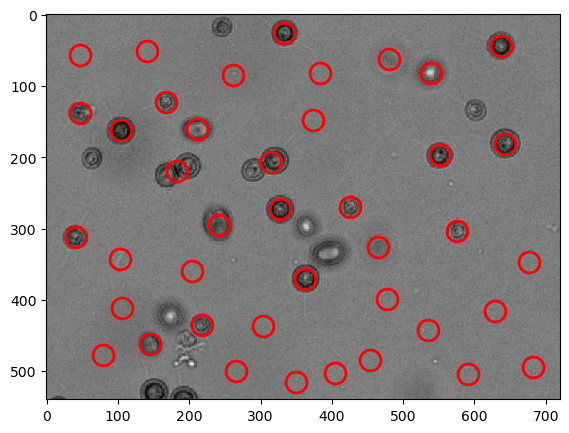

In [23]:
tp.annotate(f2, im2);

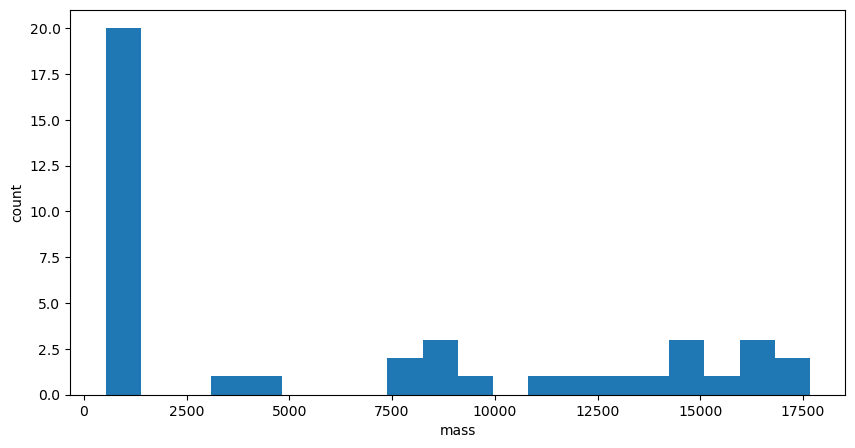

In [24]:
fig, ax = plt.subplots()
ax.hist(f2['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [25]:
f2 = tp.locate(im2, 51, invert=True, minmass=3500, separation=15)
f2.head()

y           x          mass       size       ecc     signal  \
6   19.401133  255.326743   3754.684014  19.611613  0.751836  20.705201   
7   25.259295  333.418609  14903.519357  12.289610  0.009108  34.508669   
16  43.331596  636.643894  15970.048500  12.732933  0.022580  33.945262   
29  81.355406  538.652398  10937.416928  16.001265  0.077079  17.888167   
32  80.718472  523.257326   4801.493917  16.919311  0.425014  15.211985   

    raw_mass  ep  
6    11664.0 NaN  
7    28438.0 NaN  
16   30411.0 NaN  
29   18262.0 NaN  
32   11629.0 NaN

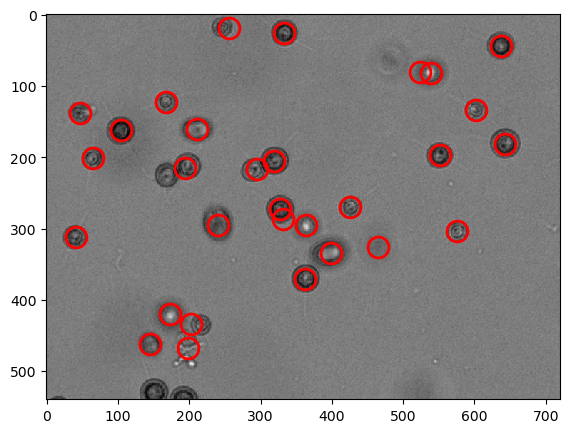

In [26]:
tp.annotate(f2, im2);

/home/n.fares/anaconda3/envs/chlamys/lib/python3.13/site-packages/trackpy/plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

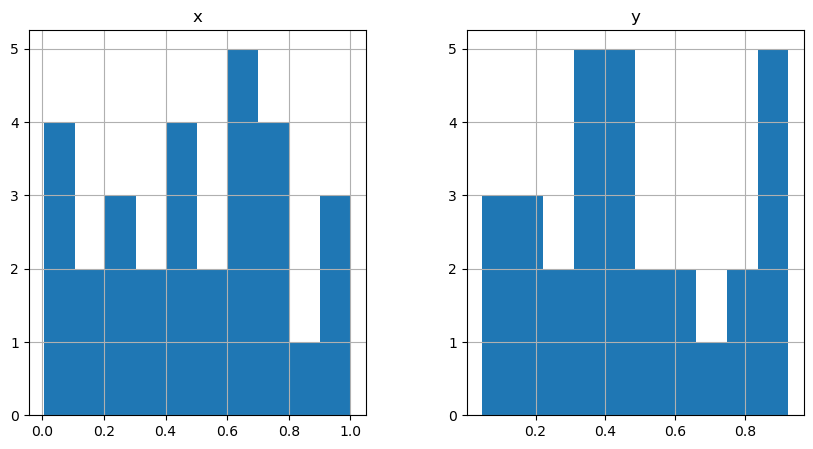

In [27]:
tp.subpx_bias(f2)

In [28]:
im3 = np.abs(im2)
im4 = cv2.GaussianBlur(im3, (3,3), cv2.BORDER_DEFAULT)

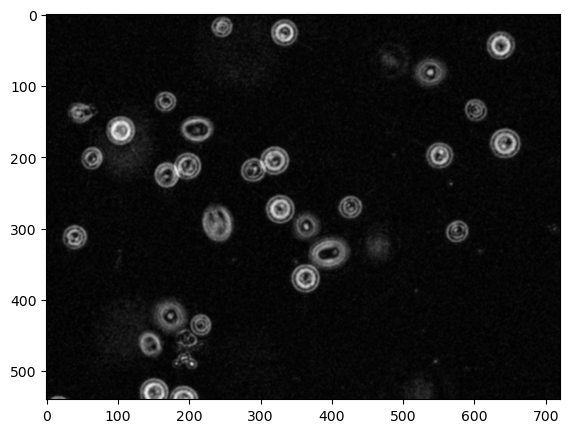

In [29]:
plt.imshow(im4)

In [30]:
im4

array([[0.89131308, 0.9964368 , 0.99309285, ..., 1.31937287, 0.67015678,
        1.        ],
       [0.89465703, 1.32293607, 1.23140739, ..., 1.21057632, 0.89120345,
        1.32984322],
       [1.        , 1.22795382, 1.45278294, ..., 1.21057632, 1.00701677,
        1.34031357],
       ...,
       [0.77549976, 1.11225012, 2.10534297, ..., 2.22817307, 1.89465703,
        1.67015678],
       [0.77193656, 1.32984322, 3.00345357, ..., 2.89465703, 1.98952965,
        1.32984322],
       [0.65968643, 1.32984322, 3.65968643, ..., 3.        , 1.65968643,
        1.        ]], shape=(540, 720))

In [31]:
f4 = tp.locate(im4, 51, invert=False, engine='python')

In [32]:
f4.head()

y           x          mass       size       ecc     signal  \
0  59.300128  147.946999    210.076127  15.381048  0.252064   2.012223   
1  43.471785  636.520268  14349.299509  12.712553  0.016969  30.719945   
2  59.026198   32.759197    240.661924  15.448570  0.188732   1.609779   
3  63.958770  481.843267   2212.506748  11.657346  0.239954   8.451338   
4  84.076486  262.261773    826.084797  14.625658  0.152503   3.487854   

       raw_mass  ep  
0   2864.554782 NaN  
1  30562.760096 NaN  
2   2860.600208 NaN  
3   8426.826682 NaN  
4   6069.978310 NaN

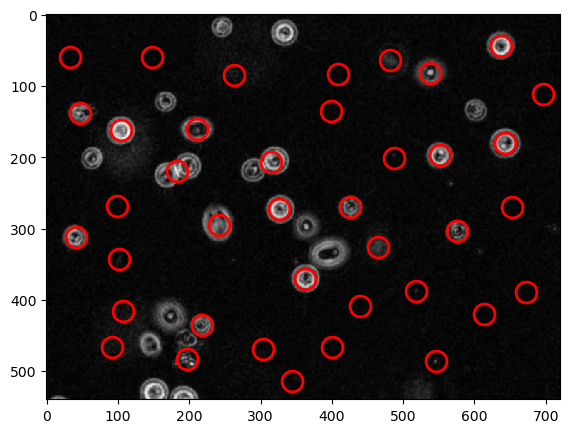

<Axes: >

In [33]:
tp.annotate(f4, im4)

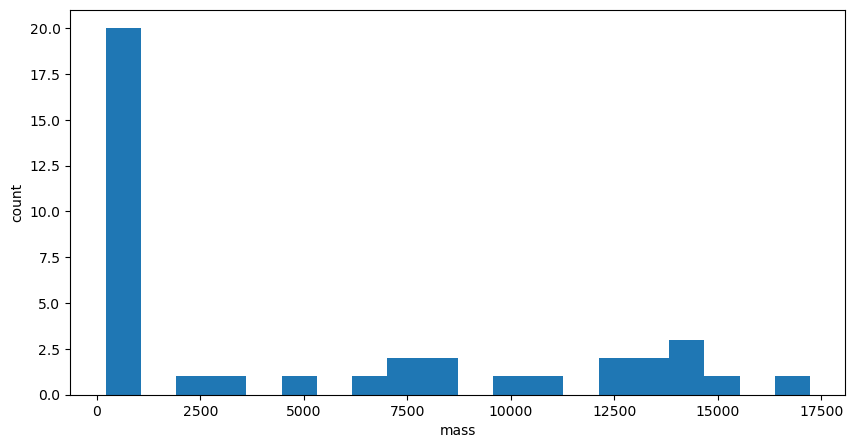

In [34]:
fig, ax = plt.subplots()
ax.hist(f4['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [35]:
f4b = tp.locate(im4, 51, invert=False, engine='python', minmass=3500, separation=15)

In [36]:
f4b

y           x          mass       size       ecc     signal  \
5     25.393093  333.030745  13443.396516  12.096506  0.021630  30.451648   
12    43.471785  636.520268  14349.299509  12.712553  0.016969  30.719945   
20    81.368964  538.237220   8425.984439  13.918654  0.098602  27.634535   
39   122.153620  167.670756   6986.842233  10.395860  0.038978  21.329568   
42   133.256971  602.031860   6677.898861  10.975591  0.081592  17.439270   
43   137.884202   47.132873   7667.912794  10.320187  0.038705  24.549126   
45   160.610477  211.006752  10868.287104  16.118174  0.043771  24.549126   
49   162.411791  104.596049  17229.864440  12.560789  0.004830  33.134613   
50   180.643060  642.716417  15015.479616  14.141138  0.029614  26.829646   
52   201.339429   65.658409   7819.366145  10.949726  0.020134  22.134458   
54   215.020101  193.718107  12974.011861  15.307771  0.232530  30.183352   
55   197.267573  551.016159  12211.915770  12.060678  0.028486  31.390686   
59   205.336984  318.445698  14576.680758  14.984762  0.102146  25.219867   
62   215.084024  298.218952  10182.789651  17.283565  0.279946  25.219867   
77   272.585986  326.455145  14268.810571  12.872860  0.044836  30.854093   
78   270.401974  425.940648   8005.698036  11.758440  0.071246  17.036825   
82   296.533117  364.894545   4846.641381  11.841024  0.102997  24.951571   
84   295.402298  240.820734  13873.073295  16.523759  0.081219  21.061272   
85   303.720182  575.487401   7027.220850  12.450522  0.073821  18.914900   
88   312.003356   40.848938  10152.874596  11.491452  0.048930  24.414978   
89   333.974434  397.422746  12519.785956  17.323982  0.067115  19.853938   
103  370.589850  362.667455  12981.792458  13.559458  0.027416  28.171128   
130  420.606496  172.845664   7913.135758  15.097514  0.098927  17.573418   
140  433.875041  203.832961   6608.678375  18.353463  0.392024  16.634380   
143  461.861226  145.035096   7912.196720  12.363890  0.033598  21.866161   
146  478.396276  197.893026   5180.402176  16.870001  0.551354  34.207799   

         raw_mass  ep  
5    28670.009374 NaN  
12   30562.760096 NaN  
20   21550.804462 NaN  
39   14032.063681 NaN  
42   13798.551000 NaN  
43   15800.227936 NaN  
45   23286.661222 NaN  
49   40952.452893 NaN  
50   33703.763549 NaN  
52   18083.888261 NaN  
54   32286.624402 NaN  
55   25949.933523 NaN  
59   35301.580876 NaN  
62   26685.359701 NaN  
77   32615.877371 NaN  
78   16700.846289 NaN  
82   17925.862040 NaN  
84   33166.165607 NaN  
85   14585.206154 NaN  
88   20552.365110 NaN  
89   31918.829935 NaN  
103  32152.692998 NaN  
130  25074.294814 NaN  
140  22146.963710 NaN  
143  20259.344736 NaN  
146  15633.552662 NaN

In [37]:
23 * px * 1e6

6.854

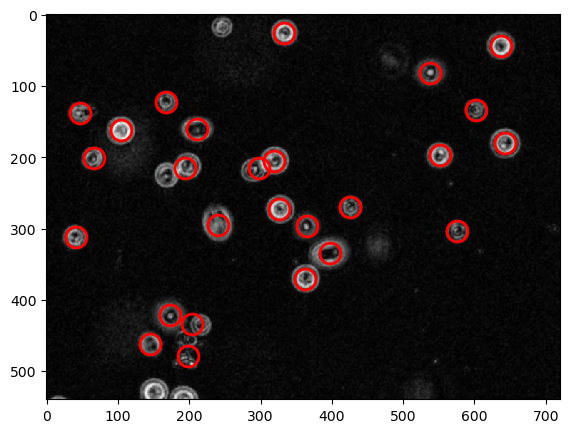

<Axes: >

In [38]:
tp.annotate(f4b, im4) 

In [39]:
# f4c = tp.locate(im4, 21, invert=True, engine='python', minmass=200)

In [40]:
index_ecc = f4b['ecc'] < 0.15
f4c = f4b[index_ecc]

In [41]:
f4c

y           x          mass       size       ecc     signal  \
5     25.393093  333.030745  13443.396516  12.096506  0.021630  30.451648   
12    43.471785  636.520268  14349.299509  12.712553  0.016969  30.719945   
20    81.368964  538.237220   8425.984439  13.918654  0.098602  27.634535   
39   122.153620  167.670756   6986.842233  10.395860  0.038978  21.329568   
42   133.256971  602.031860   6677.898861  10.975591  0.081592  17.439270   
43   137.884202   47.132873   7667.912794  10.320187  0.038705  24.549126   
45   160.610477  211.006752  10868.287104  16.118174  0.043771  24.549126   
49   162.411791  104.596049  17229.864440  12.560789  0.004830  33.134613   
50   180.643060  642.716417  15015.479616  14.141138  0.029614  26.829646   
52   201.339429   65.658409   7819.366145  10.949726  0.020134  22.134458   
55   197.267573  551.016159  12211.915770  12.060678  0.028486  31.390686   
59   205.336984  318.445698  14576.680758  14.984762  0.102146  25.219867   
77   272.585986  326.455145  14268.810571  12.872860  0.044836  30.854093   
78   270.401974  425.940648   8005.698036  11.758440  0.071246  17.036825   
82   296.533117  364.894545   4846.641381  11.841024  0.102997  24.951571   
84   295.402298  240.820734  13873.073295  16.523759  0.081219  21.061272   
85   303.720182  575.487401   7027.220850  12.450522  0.073821  18.914900   
88   312.003356   40.848938  10152.874596  11.491452  0.048930  24.414978   
89   333.974434  397.422746  12519.785956  17.323982  0.067115  19.853938   
103  370.589850  362.667455  12981.792458  13.559458  0.027416  28.171128   
130  420.606496  172.845664   7913.135758  15.097514  0.098927  17.573418   
143  461.861226  145.035096   7912.196720  12.363890  0.033598  21.866161   

         raw_mass  ep  
5    28670.009374 NaN  
12   30562.760096 NaN  
20   21550.804462 NaN  
39   14032.063681 NaN  
42   13798.551000 NaN  
43   15800.227936 NaN  
45   23286.661222 NaN  
49   40952.452893 NaN  
50   33703.763549 NaN  
52   18083.888261 NaN  
55   25949.933523 NaN  
59   35301.580876 NaN  
77   32615.877371 NaN  
78   16700.846289 NaN  
82   17925.862040 NaN  
84   33166.165607 NaN  
85   14585.206154 NaN  
88   20552.365110 NaN  
89   31918.829935 NaN  
103  32152.692998 NaN  
130  25074.294814 NaN  
143  20259.344736 NaN

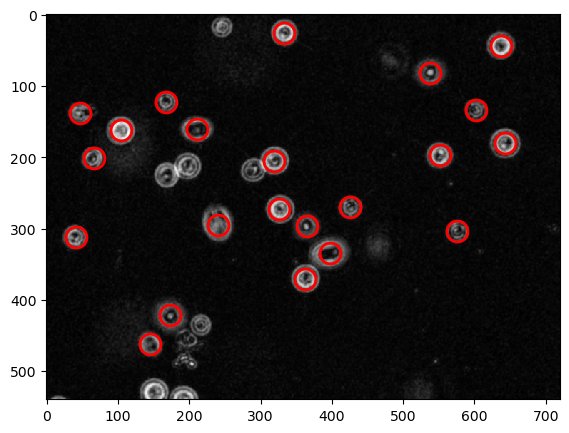

<Axes: >

In [42]:
tp.annotate(f4c, im4)

# Test Binary Image: Useless

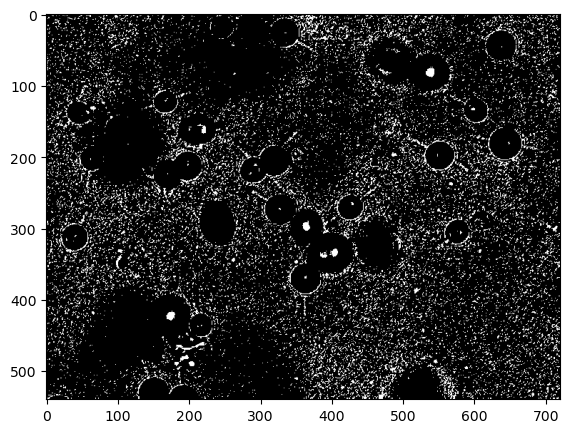

In [43]:
im5 = 255 - np.where(im2 < 3, 1, 0) * 255
im5.astype(np.uint8)
plt.imshow(im5)

In [44]:
im5

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0]], shape=(540, 720))

In [45]:
f5 = tp.locate(im5, 45, invert=False, engine='python', noise_size=1, minmass=100, separation=10)

/home/n.fares/anaconda3/envs/chlamys/lib/python3.13/site-packages/trackpy/preprocessing.py:202: RuntimeWarning: invalid value encountered in cast
  return scale_factor, (scale_factor * image.clip(min=0.)).astype(dtype)
/home/n.fares/anaconda3/envs/chlamys/lib/python3.13/site-packages/trackpy/refine/center_of_mass.py:264: RuntimeWarning: invalid value encountered in sqrt
  Rg[feat] = np.sqrt(np.sum(r_squared_mask(radius, ndim) *


In [46]:
f5.head()

y            x        mass      size        ecc      signal  \
5   4133.489695  4055.601441  199.848496       NaN  11.151599  179.415912   
6   2259.939932  2519.094583  142.114112  1.114671  34.066684  140.501592   
9   2921.139890  4082.221381  158.877502  1.035891   3.242287  151.103911   
12   768.017972   856.277005  223.192821       NaN  11.127794  138.721088   
26  2912.117381  2950.818768  119.434227  0.730884  37.943317  167.131331   

    raw_mass   ep  
5    69615.0  0.0  
6    27285.0  0.0  
9    50235.0  0.0  
12    9180.0  0.0  
26   40290.0  0.0

In [47]:
f5 = f5[f5['signal'] != 254]

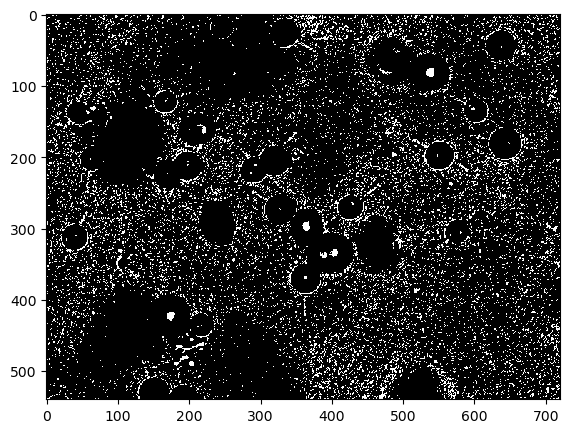

<Axes: >

In [48]:
tp.annotate(f5, im5)

# Several Images: Tracking and Linking

## Inputs

In [50]:
start = 450
stop = 6100

In [51]:
R = 51
minmass = 3500
separation = 15

param_blur = (3,3)

In [52]:
# savename = 'trajectories_' + folderpath[2:-7]
# savename = 'trajectories_' + folderpath[folderpath.find('_I_dot_')-8:-7]
# savename = 'trajectories_' + folderpath[-17:-9] + '_' + folderpath[-8]
savename = 'trajectories_' + folderpath[-23:-9] + '_' + folderpath[-8]
savename

'trajectories_20250425_fps_5_3'

## Create Modified Images

In [ ]:
# Transform all the images to be used for tracking.
# Images are modified according to the tracking on one image.
# Images are saved to a temporary folder.

# Don't know why but it leads to a modification of the mass of the images.
# So the minmass value used for tracking needs to be changed. 

temp = './temp/'
try:
    os.mkdir(temp)
except FileExistsError:
    shutil.rmtree(temp)
    os.mkdir(temp)

for i in tqdm(range(start, stop+1)):
    im1 = frames[i]
    im2 = im1 - bg
    # plt.imsave(temp + str(i) + '.tiff', im2)
    im3 = np.abs(im2)
    im4 = cv2.GaussianBlur(im3, param_blur, cv2.BORDER_DEFAULT)
    plt.imsave(temp + str(i) + '.tiff', im4)

  7%|█████████▋                                                                                                                             | 404/5651 [00:04<01:02, 84.46it/s]

In [64]:
# Open a new frames, that contains pre-processed images
frames2 = gray(pims.open(temp + '*.tiff'))

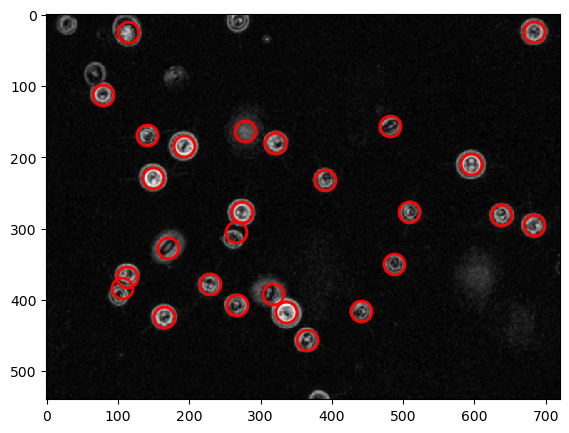

<Axes: >

In [65]:
# Try tracking on one image
i = 0
f0 = tp.locate(frames2[i], R, minmass=22000, invert=False, separation=separation, noise_size=1)
tp.annotate(f0, frames2[i])

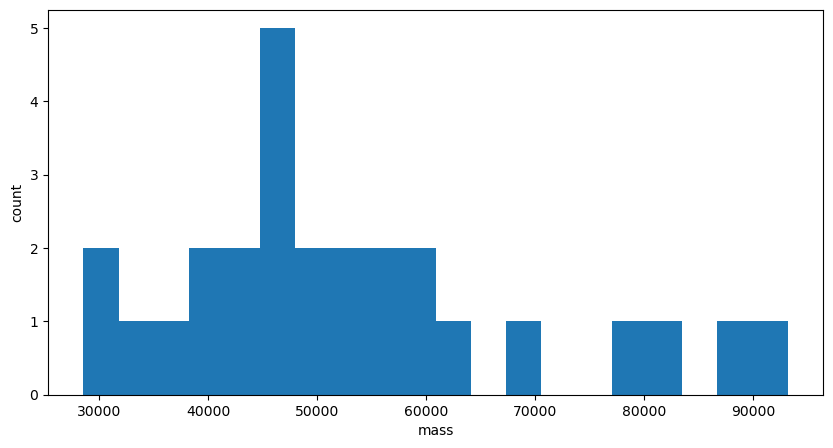

In [66]:
fig, ax = plt.subplots()
ax.hist(f0['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

## Perform Tracking and Linking

In [67]:
# Change inputs if needed

# Special care to minmass

minmass = 22000

In [68]:
# Track particles in every images 
f = tp.batch(frames2, R, minmass=minmass, invert=False, separation=separation, noise_size=1);
# f = tp.batch(frames2, R, minmass=minmass, invert=True, separation=separation);
f['frame'] += start

Frame 5500: 27 features


In [69]:
f.head()

y           x          mass       size       ecc      signal  \
0   24.126898  113.841129  51017.327490  13.795546  0.021485  136.918624   
1   23.742904  683.624621  58327.992098  13.274340  0.055877  119.803796   
2  112.155815   79.036159  52339.118822  12.151027  0.051419  141.526462   
3  156.564633  481.644439  29999.002177  11.547188  0.057630  105.322018   
4  163.064335  277.619485  28526.468706  11.672610  0.104234   61.876686   

   raw_mass  ep  frame  
0  118924.0 NaN    450  
1  124976.0 NaN    450  
2  112968.0 NaN    450  
3   61431.0 NaN    450  
4   98092.0 NaN    450

In [70]:
tp.quiet()
t = tp.link(f, 50, memory=20)

In [71]:
t.head()

y           x          mass       size       ecc      signal  \
0    24.126898  113.841129  51017.327490  13.795546  0.021485  136.918624   
23  407.695616  266.403880  40959.732988  12.687456  0.085745  103.347231   
25  423.574085  164.876538  63623.056577  12.818282  0.028876  130.335998   
24  415.260033  440.681042  41579.158109  12.400634  0.124258  120.462059   
26  456.210708  364.954565  45811.128464  12.753423  0.054243  109.271594   

    raw_mass  ep  frame  particle  
0   118924.0 NaN    450         0  
23   90786.0 NaN    450         1  
25  129069.0 NaN    450         2  
24   81633.0 NaN    450         3  
26  104520.0 NaN    450         4

In [72]:
# t[:10]

In [106]:
t1 = tp.filter_stubs(t, 200)

In [107]:
t1.head()

y           x          mass       size       ecc      signal  \
frame                                                                          
450    407.695616  266.403880  40959.732988  12.687456  0.085745  103.347231   
450    423.574085  164.876538  63623.056577  12.818282  0.028876  130.335998   
450    378.143474  228.630062  44783.580521  11.468496  0.015426  104.663756   
450    180.098154  320.659422  55368.443379  12.101246  0.020595  121.778584   
450    383.190016  106.289758  54922.141326  16.413056  0.379543  121.778584   

       raw_mass  ep  frame  particle  
frame                                 
450     90786.0 NaN    450         1  
450    129069.0 NaN    450         2  
450     94138.0 NaN    450         7  
450    117942.0 NaN    450         9  
450    123479.0 NaN    450        10

In [108]:
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 3041
After: 112


In [109]:
# Conditions on tracked particles
# t2 = t1[((t1['size'] < 30))]
t2 = t1[((t1['ecc'] < 0.2))]

In [110]:
t2.head()

y           x          mass       size       ecc      signal  \
frame                                                                          
450    407.695616  266.403880  40959.732988  12.687456  0.085745  103.347231   
450    423.574085  164.876538  63623.056577  12.818282  0.028876  130.335998   
450    378.143474  228.630062  44783.580521  11.468496  0.015426  104.663756   
450    180.098154  320.659422  55368.443379  12.101246  0.020595  121.778584   
450    276.285588  508.795580  40184.299627  11.016135  0.011848  119.803796   

       raw_mass  ep  frame  particle  
frame                                 
450     90786.0 NaN    450         1  
450    129069.0 NaN    450         2  
450     94138.0 NaN    450         7  
450    117942.0 NaN    450         9  
450     79183.0 NaN    450        11

In [111]:
print(t2['particle'].nunique())

112


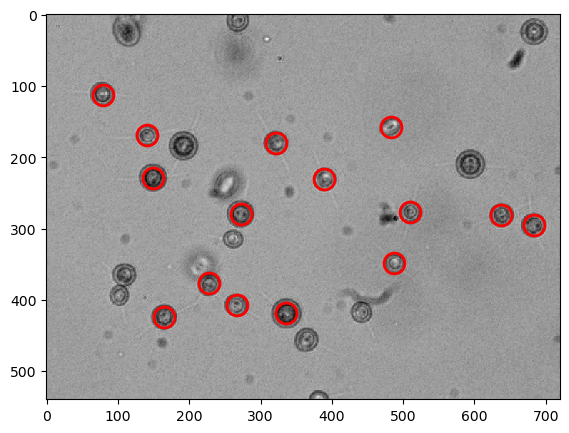

<Axes: >

In [112]:
i = 1
# plt.figure()
# plt.imshow(frames[start+i])
tp.annotate(t2[t2['frame'] == start+i], frames[start+i])

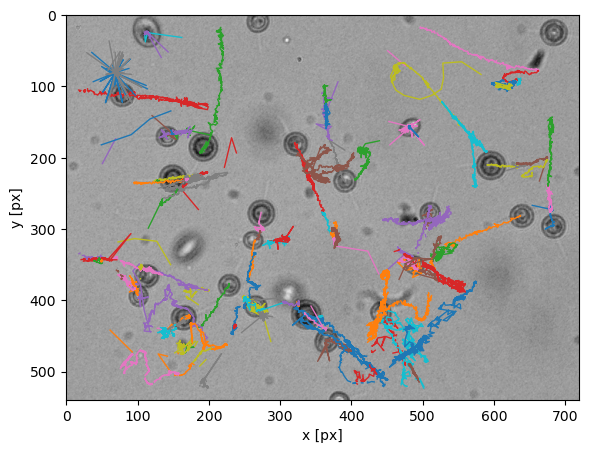

In [113]:
plt.figure()
plt.imshow(frames[start])
tp.plot_traj(t2);

In [114]:
# # Compute drifts

# d = tp.compute_drift(t2)

# d.plot()
# plt.show()

## Checks With MSDs: Last Selection of Tracked Particles 

In [115]:
# Get trajectories

tm = t2.copy() #tp.subtract_drift(t2.copy(), d)

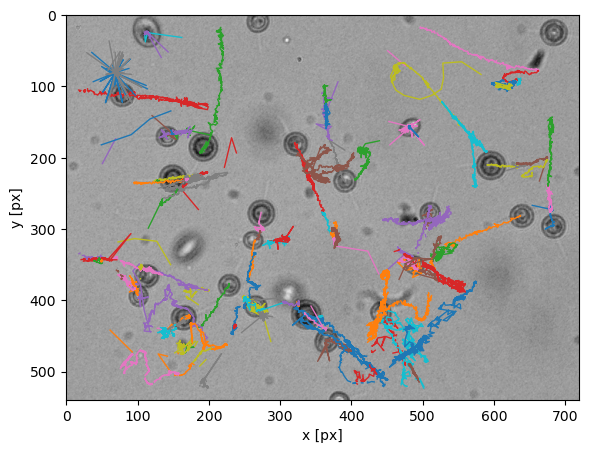

In [116]:
plt.figure()
plt.imshow(frames[start])
tp.plot_traj(tm)
plt.show()

In [117]:
im = tp.imsd(tm, px*1e6, fps)  # microns per pixel, frames per second

In [118]:
im

1          2          7          9           10    \
lag time [s]                                                          
0.2           0.081745   0.058896   0.129599   0.090790    0.279262   
0.4           0.080094   0.104730   0.144819   0.162128    0.426171   
0.6           0.079865   0.157539   0.187298   0.243022    0.498923   
0.8           0.080174   0.215042   0.242979   0.329510    0.480361   
1.0           0.085268   0.290988   0.639859   0.646529    0.589276   
...                ...        ...        ...        ...         ...   
19.2          2.841641  44.057464  44.897361  46.717595  320.595736   
19.4          2.841164  44.638139  45.882469  47.333480  320.531127   
19.6          2.874132  45.299107  47.145512  47.967914  324.891425   
19.8          2.876286  45.877879  47.657262  48.597147  332.798034   
20.0          2.924560  46.457213  48.655942  49.211296  338.301386   

                   11        12         13         14         16    ...  \
lag time [s]                                                        ...   
0.2            0.292637  0.063818   0.283825   0.078640   0.046061  ...   
0.4            0.427948  0.098675   0.308621   0.169336   0.078319  ...   
0.6            0.397946  0.153365   0.346150   0.276693   0.128063  ...   
0.8            0.423013  0.215436   0.403400   0.405646   0.192847  ...   
1.0            0.482955  0.287304   0.477724   0.557997   0.260204  ...   
...                 ...       ...        ...        ...        ...  ...   
19.2          11.402624  4.872580  35.555012  80.260394  10.082240  ...   
19.4          11.749112  4.874878  36.122463  81.588068  10.204994  ...   
19.6          11.812181  4.873777  36.671157  82.932247  10.324509  ...   
19.8          11.852699  4.881724  37.251748  84.292561  10.436205  ...   
20.0          11.875131  4.883884  37.795451  85.670827  10.536020  ...   

                  2755      2794      2818      2819      2833      2856  \
lag time [s]                                                               
0.2           0.019469  0.014710  0.012378  0.018490  0.006460  1.639406   
0.4           0.022854  0.017919  0.018807  0.022498  0.007825  2.141510   
0.6           0.028536  0.021913  0.027696  0.024801  0.008413  2.312666   
0.8           0.034295  0.025923  0.036197  0.043599  0.009175  2.119730   
1.0           0.038122  0.028831  0.046602  0.045914  0.009780  2.042405   
...                ...       ...       ...       ...       ...       ...   
19.2          0.952140  0.431669  2.550213  0.161679  0.057596  1.909711   
19.4          0.960653  0.432932  2.594589  0.134752  0.058116  1.930263   
19.6          0.963327  0.433615  2.639246  0.167099  0.058193  2.206218   
19.8          0.970125  0.432693  2.685359  0.176472  0.058843  2.655614   
20.0          0.969068  0.433599  2.731583  0.200886  0.059494  2.668650   

                  2876      2882      2913      2967  
lag time [s]                                          
0.2           0.093552  0.021201  0.898485  0.009945  
0.4           0.218854  0.020808  2.208867  0.009231  
0.6           0.334235  0.029645  2.762722  0.010131  
0.8           0.416410  0.041027  0.521622  0.012863  
1.0           0.492138  0.048906  1.209092  0.012875  
...                ...       ...       ...       ...  
19.2          8.362205  0.051123  4.343368  0.068781  
19.4          8.433397  0.066128  4.357274  0.065150  
19.6          8.507758  0.061550  4.375432  0.071782  
19.8          8.584543  0.069986  4.383174  0.069341  
20.0          8.663708  0.063279  4.391952  0.076341  

[100 rows x 112 columns]

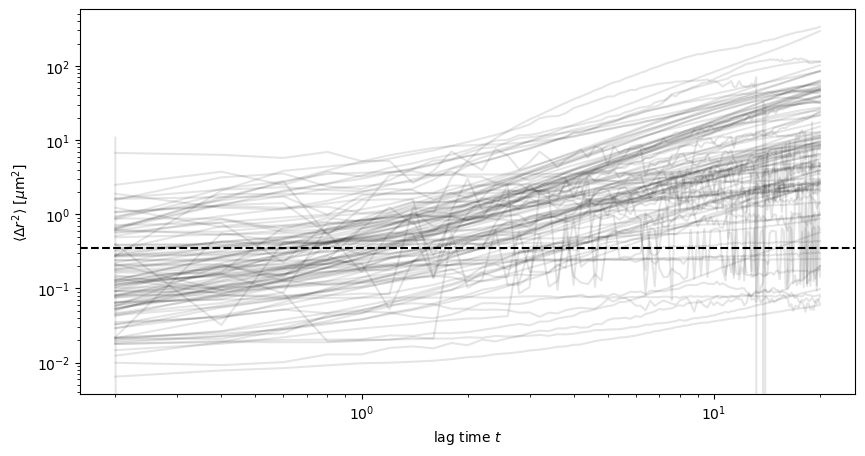

In [119]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.axhline(y=(2*px*1e6)**2, ls='--', c='k')
ax.set_xscale('log')
ax.set_yscale('log')

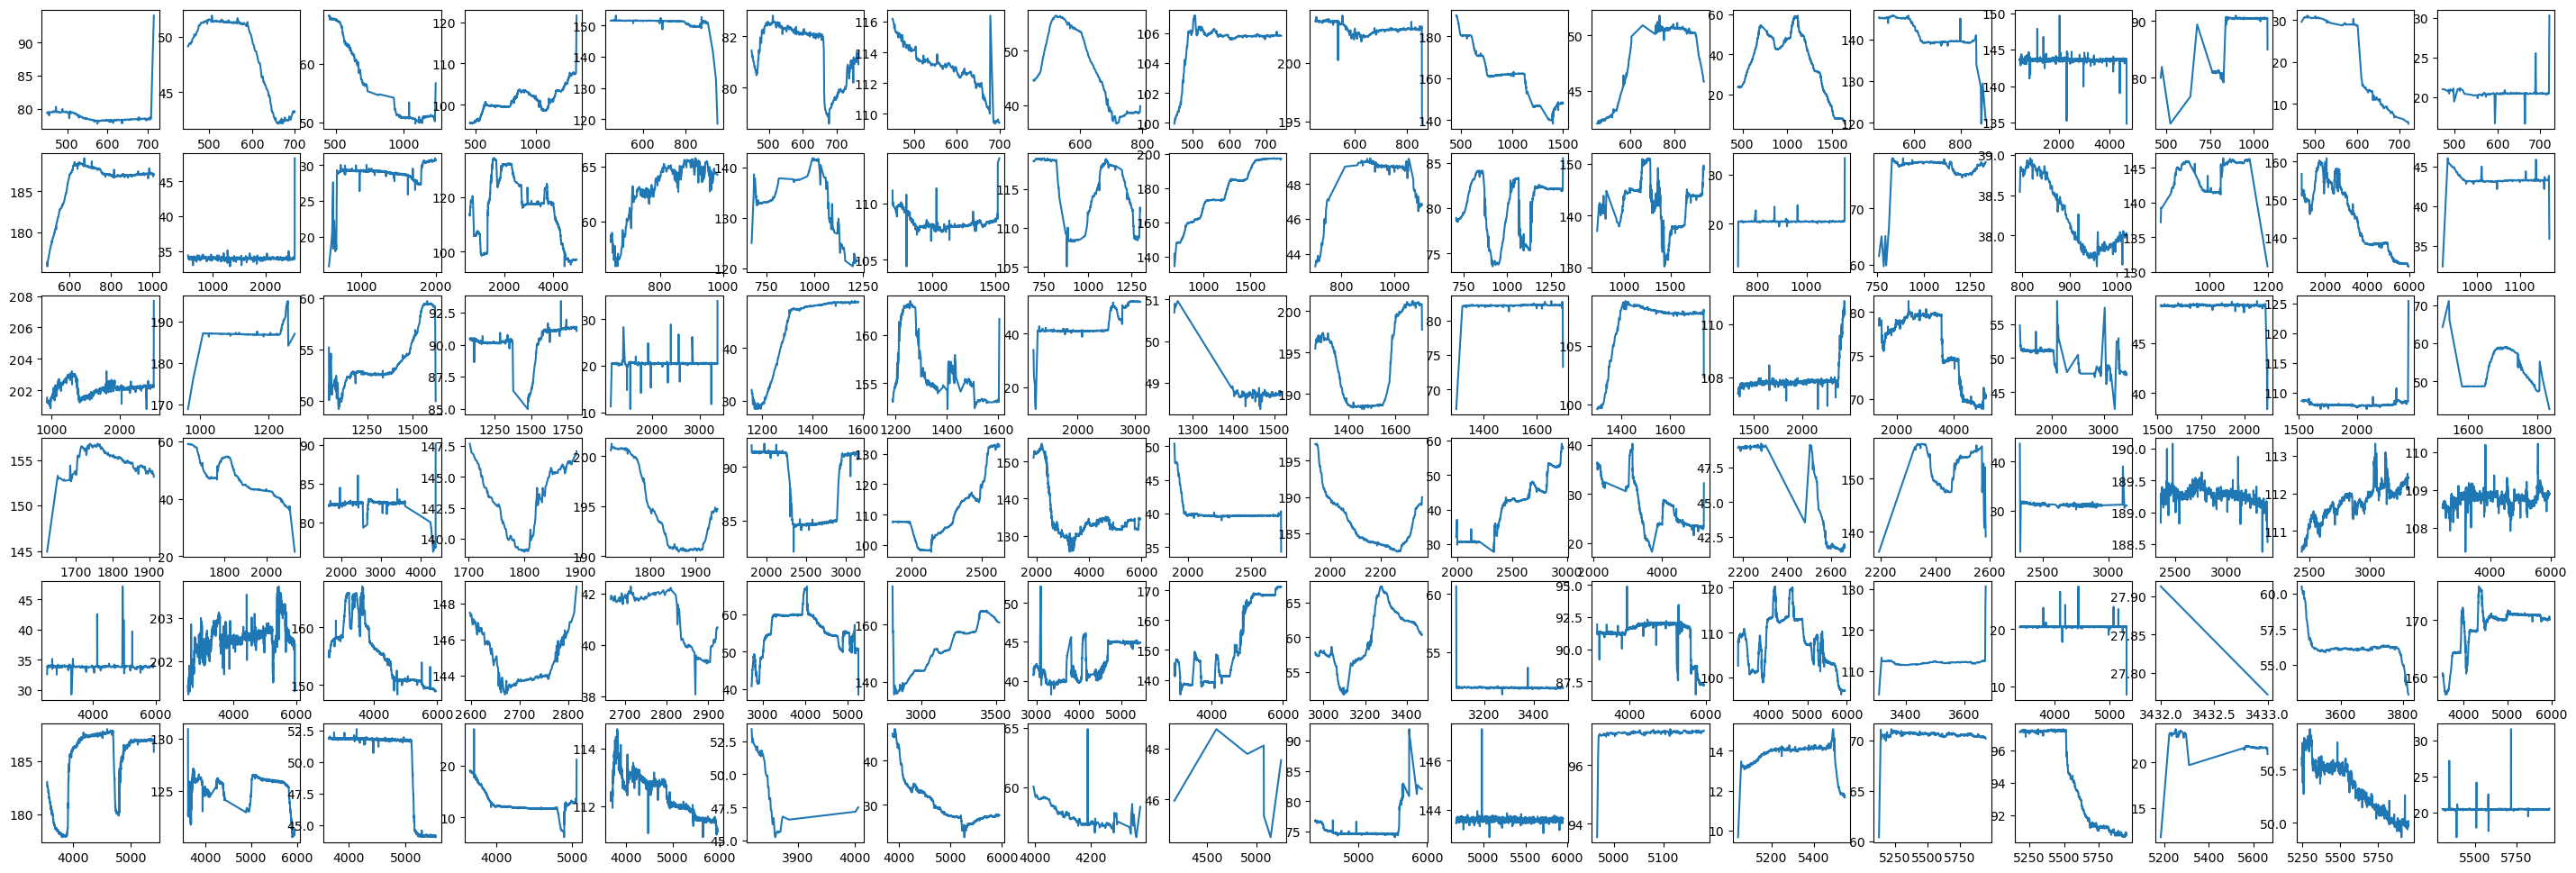

In [120]:
p = tm['particle'].unique()
N = tm['particle'].nunique()

if N // 6 > 1:
    fig, axes = plt.subplots(6, N//6, figsize=(N//6*2, 6*2))
    k = 0
    for i in range(np.shape(axes)[0]):
        for j in range(np.shape(axes)[1]):
            x = tm[tm['particle'] == p[k]]['x']
            # axes[i,j].set_title('nan')
            axes[i,j].plot(x * px * 1e6)
            k += 1
else:
    fig, axes = plt.subplots(1, N, figsize=(N*2, 2))
    for i in range(np.shape(axes)[0]):
        x = tm[tm['particle'] == p[i]]['x']
        # axes[i,j].set_title('nan')
        axes[i].plot(x * px * 1e6)
plt.show()

1


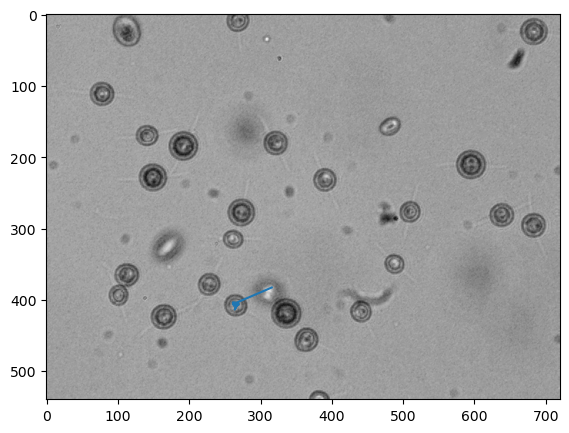

In [121]:
plt.figure()
plt.imshow(frames[start])
i = 0
print(p[i])
x = tm[tm['particle'] == p[i]]['x']
y = tm[tm['particle'] == p[i]]['y']
plt.plot(x, y)
plt.show()

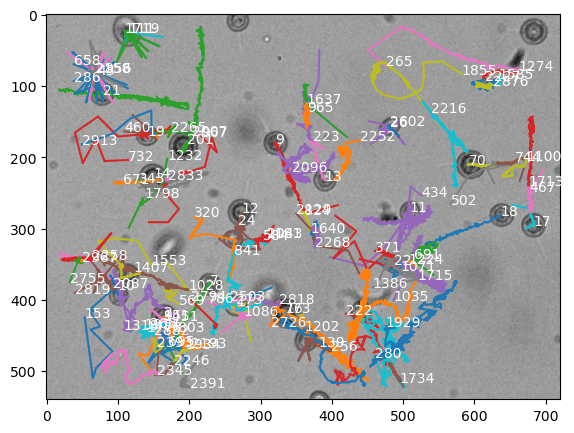

In [122]:
plt.figure()
plt.imshow(frames[start])
for i in range(len(p)):
    x = tm[tm['particle'] == p[i]]['x']
    y = tm[tm['particle'] == p[i]]['y']
    plt.plot(x, y)
    plt.annotate(str(p[i]), (x.iloc[0], y.iloc[0]), c='white')
plt.show()

In [123]:
# Exclude trajectories by eye
to_exclude_manually = [658, 286, ] 

In [124]:
# Conditions on MSD
# MSD at long time must be above resolution

threshold_late_MSD = 1 #(2*px*1e6)**2

# Get MSD at a late time
late_MSD = im.iloc[-2]
# Convert to array
array_late_MSD = np.array(late_MSD)
# Get the indexes of the trajectories to exclude, in term of column number
to_exclude_1 = np.where(array_late_MSD < threshold_late_MSD)[0] # Too slow
to_exclude_2 = np.where(np.isnan(array_late_MSD))[0] # Not defined (NaN)
to_exclude = np.concatenate((to_exclude_1, to_exclude_2))
# Convert these indexes to particle indexes
to_exclude = im.columns[to_exclude]
# Convert to list
to_exclude = list(to_exclude)
print(to_exclude)

[26, 111, 343, 695, 1086, 1585, 2007, 2043, 2158, 2246, 2393, 2602, 2726, 2755, 2794, 2819, 2833, 2882, 2967, 2087]


In [125]:
tm = t2.copy() 

# Assemble trajectories to exclude
indexes = to_exclude_manually + to_exclude

# Exclude
for i in indexes:
    tm = tm[tm['particle'] != i]

# Exclude a part of the images
# tm = tm[((tm['x'] < 650))]

# Get particles ids
p = tm['particle'].unique()
N = tm['particle'].nunique()

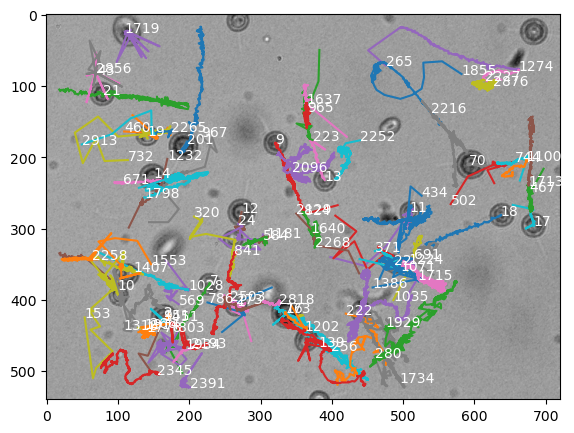

In [126]:
plt.figure()
plt.imshow(frames[start])
for i in range(len(p)):
    x = tm[tm['particle'] == p[i]]['x']
    y = tm[tm['particle'] == p[i]]['y']
    plt.plot(x, y)
    plt.annotate(str(p[i]), (x.iloc[0], y.iloc[0]), c='white')
plt.show()

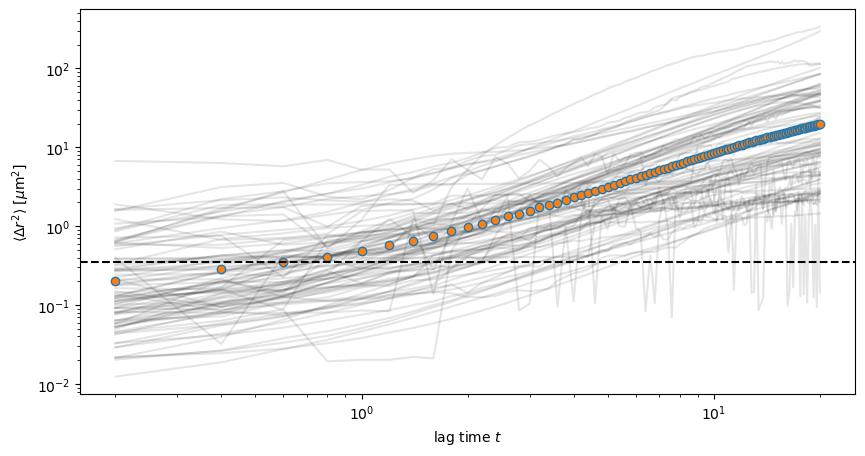

In [127]:
im = tp.imsd(tm, px*1e6, fps)  # microns per pixel, frames per second
em = tp.emsd(tm, px*1e6, fps)  # microns per pixel, frames per second

fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.plot(em.index, em, 'o', mfc='tab:orange')  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.axhline(y=(2*px*1e6)**2, ls='--', c='k')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# Save Final Trajectories

In [128]:
# tm['x'] = tm['x'] * px
# tm['y'] = tm['y'] * px
# tm.to_pickle(savename)

In [91]:
# tm = pd.read_pickle(savename)